In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import explained_variance_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

import xgboost
from xgboost import XGBRegressor, XGBRFRegressor

# classification은 import X

import warnings
warnings.filterwarnings('ignore')

# 경고 문구 삭제

In [19]:
''' 

n_estimators: 트리의 개수 (많을수록 좋지만, 과대적합되지 않도록 주의)
learning rate: 학습률 (적절한 값 잡도록 주의)
-> GridCV

-> 성능에 가장 큰 영향을 미치는 두 하이퍼파라미터 (그레디언트 부스팅)

+ 타겟 8개 밀기 적용하기!

+ Decision Tree의 중요한 매개변수는 max_depth 

'''

' \n\nn_estimators: 트리의 개수 (많을수록 좋지만, 과대적합되지 않도록 주의)\nlearning rate: 학습률 (적절한 값 잡도록 주의)\n-> GridCV\n\n-> 성능에 가장 큰 영향을 미치는 두 하이퍼파라미터 (그레디언트 부스팅)\n\n+ 타겟 8개 밀기 적용하기!\n\n+ Decision Tree의 중요한 매개변수는 max_depth \n\n'

In [47]:
x_train_data_path = ("./colab_workspace/colab_workspace/space_data/train_data/train_1h_max.csv")
y_train_data_path = ("./colab_workspace/colab_workspace/space_data/predict_data/predict_1h_max.csv")

X = pd.read_csv(x_train_data_path).drop(["kp"], axis = 1)
y = pd.read_csv(x_train_data_path).loc[:, ["kp"]]

In [48]:
new_df = pd.concat([X,y], axis=1).dropna()
y = new_df.pop("kp")
X = new_df

In [49]:
X = X.drop(["date"], axis =1)
X

,proton_density,proton_temperature,proton_speed,bx_gsm,by_gsm,bz_gsm,bt,ich_x,ich_y,ich_z,jj_x,jj_y,jj_z,gn_x,gn_y,gn_z
0,6.241279,76577.37,387.36032,1.365373,5.672788,0.600567,5.763508,29779.13,-4278.25,40694.08,33230.181102,-286.159383,31625.37,29648.872476,-108.229278,41083.53
3,6.813561,67664.01,378.40260,-0.581965,6.174460,-1.593402,6.897248,29756.05,-4288.25,40682.30,33210.391417,-293.578526,31612.36,29629.344341,-122.948941,41075.97
6,6.917184,79429.81,384.22640,-0.686914,6.641247,6.944213,8.015132,29760.81,-4305.17,40687.11,33212.001472,-310.976367,31621.27,29634.529857,-136.638547,41080.17
9,6.566628,110697.47,393.20218,3.735692,10.023702,1.690962,10.598715,29771.09,-4296.02,40688.76,33220.962782,-303.387349,31624.04,29643.270732,-125.978862,41081.21
12,6.216072,200632.03,460.29530,8.882007,9.846230,9.389044,17.023562,29738.60,-4288.57,40691.35,33188.173336,-303.197334,31622.28,29610.383454,-124.738893,41081.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70113,10.770000,256008.00,458.40000,2.450000,3.650000,3.200000,4.070000,29767.41,-4150.96,41045.77,33215.171285,-651.444718,31964.67,29628.571043,-456.985646,41413.89
70116,6.740000,129209.00,431.30000,2.410000,4.420000,-0.430000,4.870000,29770.47,-4152.61,41045.63,33218.757847,-652.474145,31964.66,29631.557913,-458.455128,41413.30
70119,7.860000,91233.00,435.40000,1.450000,4.920000,3.350000,5.240000,29775.79,-4142.71,41046.29,33222.570160,-645.198276,31966.89,29637.027073,-449.078408,41416.61
70122,10.090000,93252.00,431.50000,2.180000,4.150000,5.230000,5.930000,29776.17,-4155.73,41045.82,33224.150389,-655.502417,31967.44,29637.257036,-461.923889,41414.04


In [50]:
y

0        3.0
3        3.0
6        1.0
9        3.0
12       4.0
        ... 
70113    1.0
70116    2.0
70119    3.0
70122    1.0
70125    2.0
Name: kp, Length: 23376, dtype: float64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [52]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [53]:
'''

def grid_search(params, random=False): 

    xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=3, subsample=0.7,
                           colsample_bytree=1, max_depth=3)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    if random:
        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20, 
                                  n_jobs=-1, random_state=2)
    else:
        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)
    
    # X와 y에서 하이퍼파라미터 튜닝을 수행합니다.
    grid.fit(X, y)

    # 최상의 매개변수를 추출합니다.
    best_params = grid.best_params_

    # 최상의 매개변수를 출력합니다.
    print("최상의 매개변수:", best_params)
    
    # 최상의 점수를 추출합니다.
    best_score = grid.best_score_

    # 최상의 점수를 출력합니다.
    print("최상의 점수: {:.5f}".format(best_score))
    

'''

'\n\ndef grid_search(params, random=False): \n\n    xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=3, subsample=0.7,\n                           colsample_bytree=1, max_depth=3)\n    \n    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)\n    \n    if random:\n        grid = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=20, \n                                  n_jobs=-1, random_state=2)\n    else:\n        grid = GridSearchCV(xgb, params, cv=kfold, n_jobs=-1)\n    \n    # X와 y에서 하이퍼파라미터 튜닝을 수행합니다.\n    grid.fit(X, y)\n\n    # 최상의 매개변수를 추출합니다.\n    best_params = grid.best_params_\n\n    # 최상의 매개변수를 출력합니다.\n    print("최상의 매개변수:", best_params)\n    \n    # 최상의 점수를 추출합니다.\n    best_score = grid.best_score_\n\n    # 최상의 점수를 출력합니다.\n    print("최상의 점수: {:.5f}".format(best_score))\n    \n\n'

In [54]:
# 선형 회귀 용 그리드 서치 함수

def grid_search(params, reg=XGBRegressor(booster='gbtree')):

    # GridSearchCV를 초기화합니다.
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=kfold)
    
    # X_train와 y_train에서 훈련합니다.
    grid_reg.fit(X, y)

    # 최상의 매개변수를 추출합니다.
    best_params = grid_reg.best_params_

    # 최상의 매개변수를 출력합니다.
    print("최상의 매개변수:", best_params)
    
    # 최상의 점수를 추출합니다.
    best_score = np.sqrt(-grid_reg.best_score_)

    # 최상의 점수를 출력합니다.
    print("최상의 점수:", best_score)

In [55]:
'''


기본 학습기로 드롭아웃 규제를 적용한 dart를 쓸 수도 있다. 
(gbtree와 유사한 상황에서 활용 가능 -> 꼭 바꾼 뒤, girdCV 해보기)

regression_model(XGBRegressor(booster='dart', rate_drop=0.5))

XGBRFRegressor -> 랜덤포레스트가 기본 학습기가 된다.
-> 앙상블을 기본 학습기로 활용 (이건 RF에 이미 랜덤 포레스트 의미)
따라서 
가 아니라 n_estimators에서 활용한다. 
+ 학습률은 1에서 변경하는 것을 권하지 않음 (변경하지 말 것 )



'''

"\n\n\n기본 학습기로 드롭아웃 규제를 적용한 dart를 쓸 수도 있다. \n(gbtree와 유사한 상황에서 활용 가능 -> 꼭 바꾼 뒤, girdCV 해보기)\n\nregression_model(XGBRegressor(booster='dart', rate_drop=0.5))\n\nXGBRFRegressor -> 랜덤포레스트가 기본 학습기가 된다.\n-> 앙상블을 기본 학습기로 활용 (이건 RF에 이미 랜덤 포레스트 의미)\n따라서 \n가 아니라 n_estimators에서 활용한다. \n+ 학습률은 1에서 변경하는 것을 권하지 않음 (변경하지 말 것 )\n\n\n\n"

In [56]:
grid_search(params={'n_estimators':[100, 200, 400, 800]})

최상의 매개변수: {'n_estimators': 100}
최상의 점수: 0.7238685184320743


In [ ]:
grid_search(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]})

In [ ]:
grid_search(params={'max_depth':[2, 3, 5, 6, 8]})

In [ ]:
grid_search(params={'gamma':[0, 0.01, 0.1, 0.5, 1, 2]})

In [ ]:
grid_search(params={'min_child_weight':[1, 2, 3, 4, 5]})

In [ ]:
grid_search(params={'subsample':[0.5, 0.7, 0.8, 0.9, 1]})

In [ ]:
grid_search(params={'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1]})

In [ ]:
grid_search(params={'colsample_bylevel':[0.5, 0.7, 0.8, 0.9, 1]})

In [ ]:
grid_search(params={'colsample_bynode':[0.5, 0.7, 0.8, 0.9, 1]})

In [ ]:
grid_search(params={'n_estimators':[100, 200, 400, 800],
                    'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                    'max_depth':[2, 3, 5, 6, 8],
                    'gamma':[0, 0.01, 0.1, 0.5, 1, 2],
                    'min_child_weight':[1, 2, 3, 4, 5],
                    'subsample':[0.5, 0.7, 0.8, 0.9, 1],
                    'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1],
                    'colsample_bylevel':[0.5, 0.7, 0.8, 0.9, 1],
                    'colsample_bynode':[0.5, 0.7, 0.8, 0.9, 1]
                   }
           )

# 시간 너무 많이 걸리는 듯

In [ ]:
grid_search(params={'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                    'min_child_weight':[1, 2, 3, 4, 5], 
                    'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 
                    'max_depth':[1, 2, 3, 4, 5, None], 
                    'n_estimators':[2, 25, 50, 75, 100]}, random=True)

In [ ]:
 # xgb_model = xgboost.XGBRegressor(n_estimators=800, learning_rate=0.2, max_depth=8, gamma=0.5, subsample=0.5, 
 #                                   min_child_weight=4, colsample_bytree= 0.9, colsample_bylevel=0.8, colsample_bynode= 0.8)

In [57]:
xgb_model = xgboost.XGBRegressor(n_estimators=800, learning_rate=0.08, gamma=3, subsample=0.7,
                           colsample_bytree=1, max_depth=2)

xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=800, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

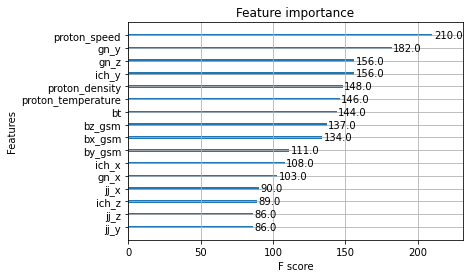

In [58]:
xgboost.plot_importance(xgb_model)

# Correlation

In [36]:
# 각 모델별 예측을 반환하는 함수 (predict funtc)

def y_pred(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = sklearn.metrics.mean_squared_error(y_pred, y_test)
    print(score)
    return y_pred

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [39]:
y_pred_gbtree = y_pred(XGBRegressor())

0.5168685767574595


In [38]:
y_pred_dart = y_pred(XGBRegressor(booster='dart', one_drop=True))

0.5117006611374725


In [40]:
y_pred_forest = y_pred(RandomForestRegressor(random_state=2))

0.5433167180013689


In [41]:
y_pred_xgb = y_pred(XGBRegressor(max_depth=2, n_estimators=500, learning_rate=0.1))

0.5265270145070513


In [44]:
# 상관관계를 파악하기 위해, np.c_ (concat)

df_pred = pd.DataFrame(data= np.c_[y_pred_gbtree, y_pred_dart, 
                                   y_pred_forest, y_pred_xgb],
                       columns=['gbtree', 'dart', 'forest', 'xgb'])

In [45]:
# 상관관계를 파악 -> Correaltion

df_pred.corr()

,gbtree,dart,forest,xgb
gbtree,1.000000,0.940858,0.907672,0.921757
dart,0.940858,1.000000,0.931803,0.946351
forest,0.907672,0.931803,1.000000,0.938286
xgb,0.921757,0.946351,0.938286,1.000000


# Stacking

In [ ]:
'''

StackingClassifier 예시
-> 우리는 Regressor



# 빈 리스트 생성  (앙상블 모델 제작 과정과 유사)
base_models = []

# 세 모델을 어펜드 ('이름', 모델) 튜플 형식으로 추가
base_models.append(('lr', LogisticRegression()))
base_models.append(('xgb', XGBClassifier()))
base_models.append(('rf', RandomForestClassifier(random_state=2)))

# 메타 모델을 정의합니다. (상위 모델로 간단한 모델을 활용하는 것이 좋다. )
meta_model = LogisticRegression()

# 스태킹 앙상블을 만듭니다.
clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
scores = cross_val_score(clf, X, y, cv=kfold)
print(scores.mean())

# 난 StackingRegressor을 활용하면 됨

'''

In [ ]:
base_models = []

## base_models.append(('lr', LogisticRegression()))
base_models.append(('gbtree', XGBRegressor()))
base_models.append(('rf', RandomForestRegressor(random_state=2)))
base_models.append(('xgb', XGBRegressor(max_depth=2, n_estimators=500, learning_rate=0.1)))

# 메타 모델을 정의합니다. (여기도 바뀌어야 함)
# regression에 적합한 스태킹 메타 모델 찾아보기
meta_model = LogisticRegression()

# 스태킹 앙상블을 만듭니다.
clf = StackingRegressor(estimators=base_models, final_estimator=meta_model)
# 여기에 mse 적용해서 보면 좋겠다.
scores = cross_val_score(clf, X, y, cv=kfold)
print(scores.mean())

In [ ]:
# 최종 모델이 그럼 clf?

In [59]:
predictions = xgb_model.predict(X_test)
predictions

array([3.4765828, 1.0803941, 3.0056603, ..., 2.9329262, 3.1497574,
       1.8071301], dtype=float32)

In [60]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)

0.521946838657037


In [61]:
y_pred = xgb_model.predict(X_val)
y_pred

sklearn.metrics.mean_squared_error(y_val, y_pred)

0.537127521760466

In [62]:
predict_df = pd.read_csv("./colab_workspace/colab_workspace/space_data/predict_data/predict_3h_max.csv")
predict_df.drop(["date"],axis=1,inplace=True)


In [63]:
result = xgb_model.predict(predict_df)[-480:]

In [ ]:
save_path = "xg3.xlsx"

df = pd.read_excel("./colab_workspace/colab_workspace/file/quiz.xlsx")
df["정답"] = result
df.to_excel(save_path, index=False)

In [ ]:
result = np.round(result,0)

save_path = "xg3_round.xlsx"

df = pd.read_excel("./colab_workspace/colab_workspace/file/quiz.xlsx")
df["정답"] = result
df.to_excel(save_path, index=False)

In [ ]:
# kp 지수 8칸 밀기 주의 (9?)

In [ ]:
# gridCV 활용

# 모델 앙상블 (Voting or Stacking)